### **Loan-Approval-Prediction with ML**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud

In [26]:
# Import the Dataset
df = pd.read_csv('E:/Amruta Study material/Data Anaylist_WS cube/ML_6th Milestone/loan_approval_dataset.csv')

In [27]:
# Data Cleaning and Removes leading or trailing spaces from column names
df.columns = df.columns.str.strip()
df['loan_status'] = df['loan_status'].astype(str).str.strip()

In [28]:
# Remove rows other then where loan_status is 'Approved' or 'Rejected'
df = df[df['loan_status'].isin(['Approved', 'Rejected'])]

In [29]:
# Feature Engineering and Encodes 'Approved' as 1 and 'Rejected' as 0 for loan_status
df['loan_status'] = df['loan_status'].map({'Approved': 1, 'Rejected': 0})

In [30]:
# Feature Engineering and Encoding Categorical Variables and Creating New Features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['education'] = le.fit_transform(df['education'].astype(str).str.strip())
df['self_employed'] = le.fit_transform(df['self_employed'].astype(str).str.strip())
df['log_income'] = np.log(df['income_annum'])

In [31]:
# Seprated the Dataset into Features and Target Variable for Model Training
X = df.drop(['loan_id', 'loan_status'], axis=1)
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Model of Training, Fitting a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
# Predictions and Performance Metrics
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9765807962529274

Confusion Matrix:
 [[302  16]
 [  4 532]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       318
           1       0.97      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



##  **Confusion Matrix Heatmap & Visualizes model performance on true vs. predicted labels**

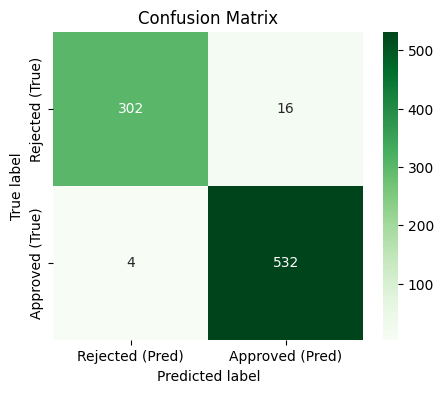

In [35]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Rejected (Pred)', 'Approved (Pred)'], 
            yticklabels=['Rejected (True)', 'Approved (True)'])
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

###  **ROC Curve & AUC Shows the discrimination capability of the model**


In [39]:
pip install plotly

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.6 MB 7.1 MB/s eta 0:00:02
   -------- ------------------------------- 2.1/9.6 MB 5.5 MB/s eta 0:00:02
   ------------------------- -------------- 6.0/9.6 MB 10.4 MB/s eta 0:00:01
   ------------------------------- -------- 7.6/9.6 MB 9.7 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.6 MB 10.6 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 9.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
from sklearn.metrics import roc_curve, roc_auc_score
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, auc

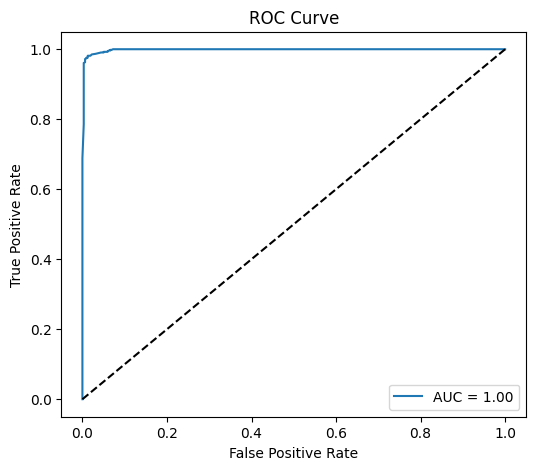

In [47]:
y_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc))
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
# Feature Importance Plot,which features are most influential for prediction.

C:\Users\AMRUTA\AppData\Local\Temp\ipykernel_14148\1501106018.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




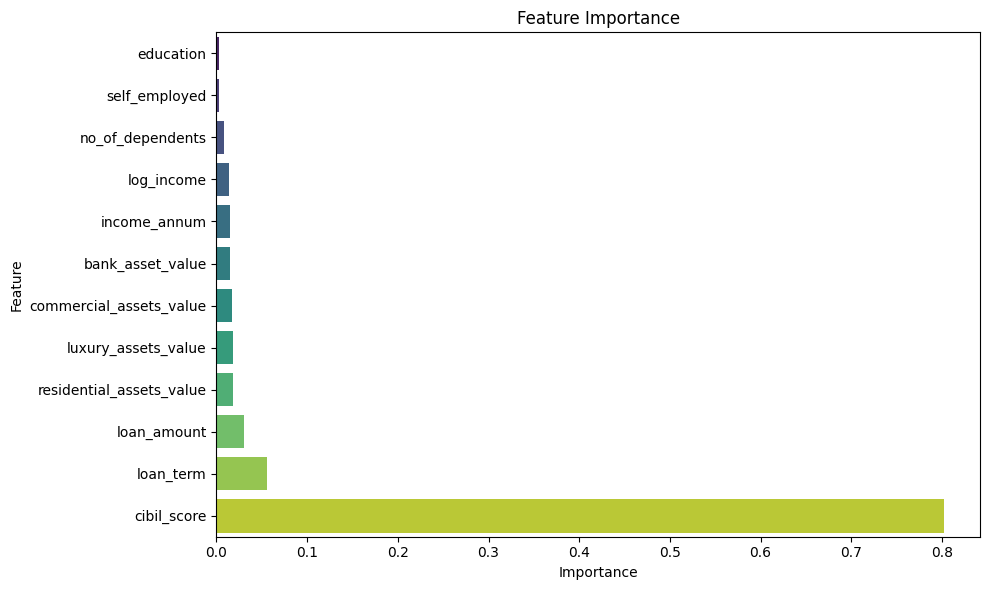

In [50]:
importances = model.feature_importances_
feat_names = X.columns

# DataFrame for sorting and plotting
feat_imp_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette="viridis")
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
# Bar Chart of Actual vs Predicted Values
# This shows how many loans were actually approved/rejected vs how many your model predicted.

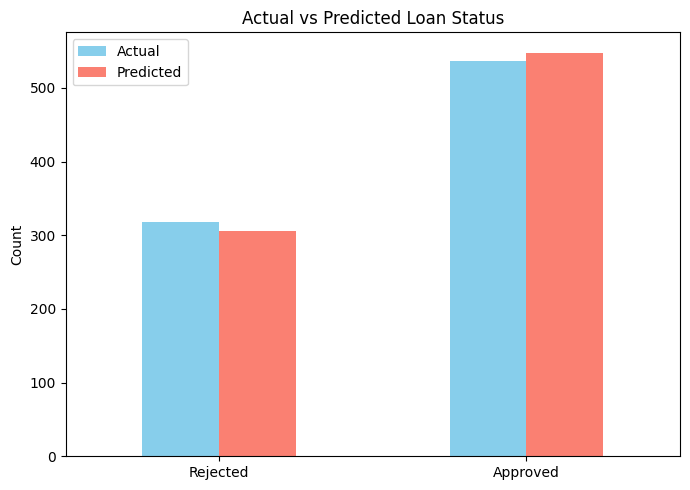

In [55]:
# Raw details of the data
actual_counts = pd.Series(y_test, name='Actual')
pred_counts = pd.Series(y_pred, name='Predicted')

counts_df = pd.DataFrame({'Actual': actual_counts.value_counts(),
                          'Predicted': pred_counts.value_counts()}).sort_index()

counts_df.index = ['Rejected', 'Approved']

# barplot
counts_df.plot(kind='bar', figsize=(7,5),color = ['skyblue', 'salmon'])
plt.title('Actual vs Predicted Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\AMRUTA\AppData\Local\Temp\ipykernel_14148\183187528.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




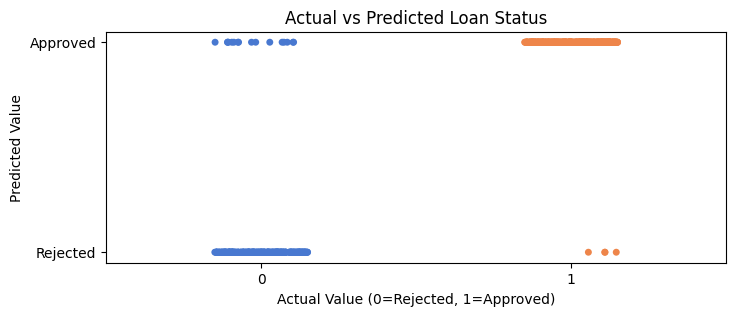

In [57]:
# Strip Plot: Actual vs Predicted,This shows each prediction versus the actual value.

plt.figure(figsize=(8, 3))
sns.stripplot(x=y_test, y=y_pred, jitter=0.15, palette='muted', marker='o')
plt.xlabel('Actual Value (0=Rejected, 1=Approved)')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted Loan Status')
plt.yticks([0, 1], ['Rejected', 'Approved'])
plt.show()

## **Thank You**